<h1 align='center' style="color: blue;">Big Data Analytics - fraudulent credit card transactions (Imbalanced data)</h1>

<h3 align='center' style="color: black;">Importing libraries and working with data</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the dataset

credit_data = pd.read_csv("creditcard.csv")

In [3]:
# checking the contents of the data

credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
credit_data.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [7]:
print(' Number of duplicates in the original dataset:', credit_data.duplicated().sum())

 Number of duplicates in the original dataset: 1081


In [8]:
new_credit_data = credit_data.drop_duplicates()

In [9]:
new_credit_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
new_credit_data.shape

(283726, 31)

In [11]:
credit_data.shape

(284807, 31)

In [12]:
print(284807 - 283726) # checking if correct number of records are removed

1081


<h3 align='center' style="color: black;">Exploratory Analysis</h3>

<AxesSubplot:xlabel='Class', ylabel='Count'>

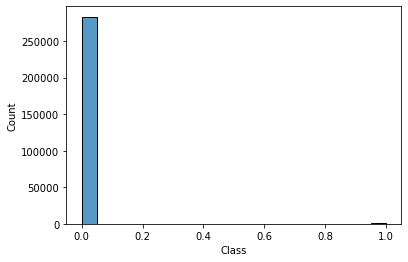

In [13]:
sns.histplot(x=new_credit_data['Class'], data=new_credit_data)

/Users/ammu/Desktop/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


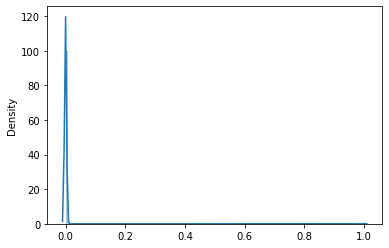

In [14]:
figsize = (15,11)
sns.distplot(x=new_credit_data['Class'], bins=100)
plt.show()

<AxesSubplot:xlabel='Class', ylabel='count'>

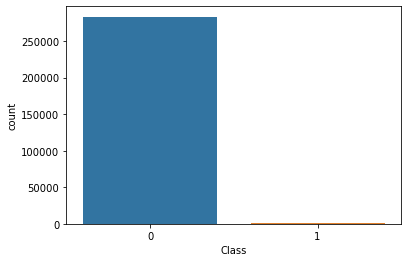

In [15]:
sns.countplot(x=new_credit_data['Class'],data=new_credit_data)

In [16]:
# checking for counts of 0's and 1's

new_credit_data['Class'].value_counts(normalize=True) * 100

0    99.83329
1     0.16671
Name: Class, dtype: float64

In [17]:
new_credit_data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

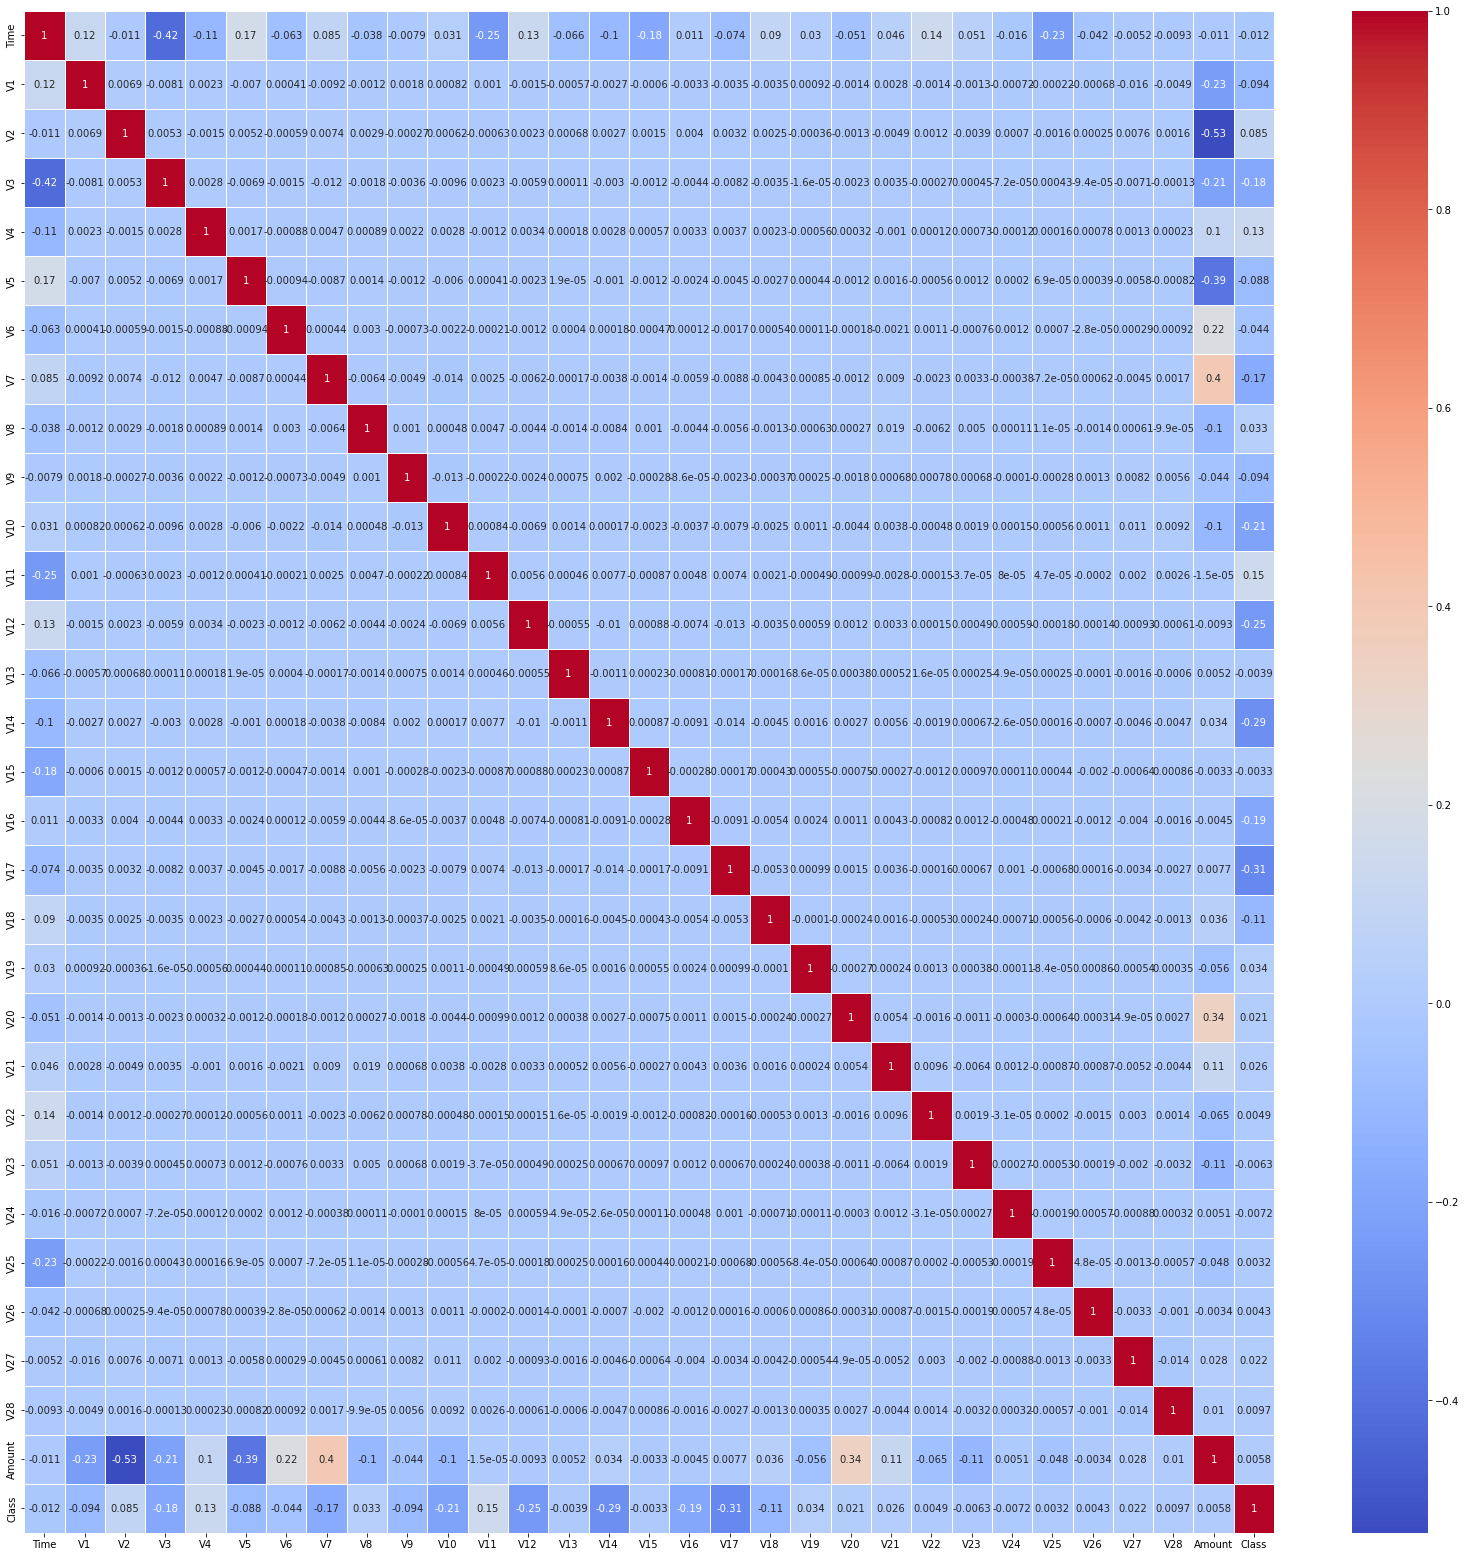

In [19]:
# Correlation of features 

plt.figure(figsize = (28,28))
sns.heatmap(new_credit_data.corr(), annot=True, cmap='coolwarm',linewidths = .6)
plt.show()

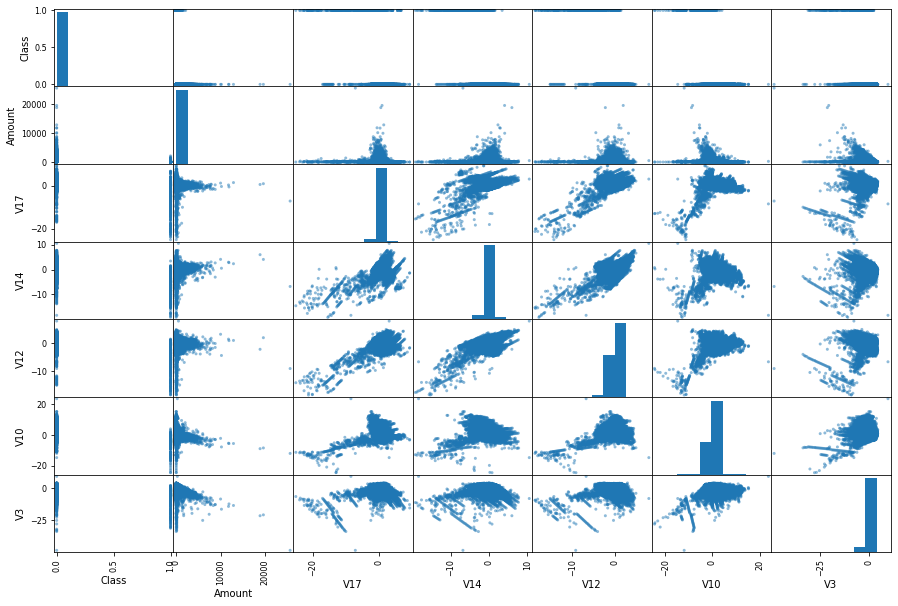

In [71]:
# constructing scatter matrix plot with above correlated variables

from pandas.plotting import scatter_matrix
attributes = ['Class','Amount','V17', 'V14', 'V12', 'V10', 'V3']
scatter_matrix(new_credit_data[attributes], figsize=(15,10))
plt.show()

<h3 align='center' style="color: black;">Specifying X (predictor) and y (target) variables</h3>

In [18]:
X = new_credit_data.drop(columns=['Class'], axis=1)

In [19]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [20]:
X.shape

(283726, 30)

In [21]:
y = new_credit_data['Class']

In [22]:
y.shape

(283726,)

<h3 align='center' style="color: black;">Balancing the data using SMOTE technique</h3>

In [23]:
# Using SMOTE to balance the dataset
import seaborn as sns
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_smote_data, y_smote_data = smote.fit_resample(X,y)

In [24]:
X_smote_data.shape

(566506, 30)

In [25]:
y_smote_data.shape

(566506,)

/Users/ammu/Desktop/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

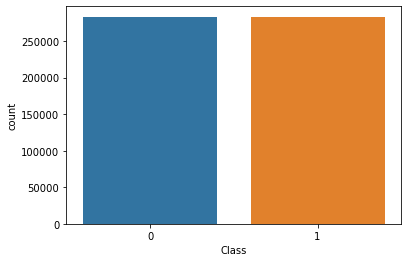

In [26]:
# plot balanced class distribution

sns.countplot(y_smote_data)

In [30]:
# sns.distplot(y_smote_data)

In [31]:
# sns.histplot(y_smote_data)

In [32]:
# plt.figure(figsize = (28,28))
# sns.heatmap(new_credit_data.corr(), annot=True, cmap='coolwarm',linewidths = .6)
# plt.show()

In [33]:
#bal_credit_data = X_smote_data.add(y_smote_data)

<h3 align='center' style="color: black;">Training the model</h3>

### 1. Random Forest 

#### Random Forest (with original data)

In [27]:
# Random Forest with Original data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


# Train and test model using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf_model.fit(X_train,y_train)

y_pred = rf_model.predict(X_test)



classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.95      0.75      0.84       134

    accuracy                           1.00     85118
   macro avg       0.98      0.87      0.92     85118
weighted avg       1.00      1.00      1.00     85118


Confusion matrix report:
 [[84979     5]
 [   34   100]]

Balanced accuracy for random forest 
: 99.95418125425878



<AxesSubplot:>

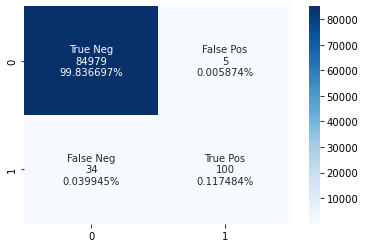

In [28]:
# Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cr_rf_model = classification_report(y_test, y_pred)
print("classification report:\n", cr_rf_model)

print()
cf_rf_model = confusion_matrix(y_test, y_pred)
print("Confusion matrix report:\n", cf_rf_model)

print()
bal_acc_rf_model = accuracy_score(y_test,y_pred, normalize = True)* 100
print("Balanced accuracy for random forest \n:", bal_acc_rf_model)


# heatmap
print()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_rf_model.flatten()]
group_percentages = ['{0:2%}'.format(value) for value in cf_rf_model.flatten()/np.sum(cf_rf_model)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, (ax1) = plt.subplots(1)
sns.heatmap(cf_rf_model, annot=labels, fmt='', cmap='Blues', ax=ax1)

Text(0, 0.5, 'Recall')

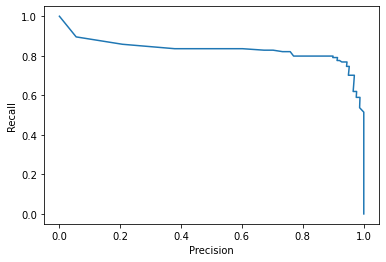

In [29]:
# PR curve


from sklearn.metrics import precision_recall_curve 
precision, recall, thresholds = precision_recall_curve(y_test,rf_model.predict_proba(X_test)[:,1])


plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

#### Random Forest (with balanced data [SMOTE technique])

In [30]:
# Random Forest with balanced (SMOTE) data



from sklearn.model_selection import train_test_split

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote_data, y_smote_data, test_size=0.30, random_state=42)


# Train and test model using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

bal_rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
bal_rf_model.fit(X_train_smote,y_train_smote)

y_pred_smote = bal_rf_model.predict(X_test)



classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.94      1.00      0.97       134

    accuracy                           1.00     85118
   macro avg       0.97      1.00      0.99     85118
weighted avg       1.00      1.00      1.00     85118


Confusion matrix report:
 [[84976     8]
 [    0   134]]

Balanced accuracy for random forest 
: 99.99060128292489



<AxesSubplot:>

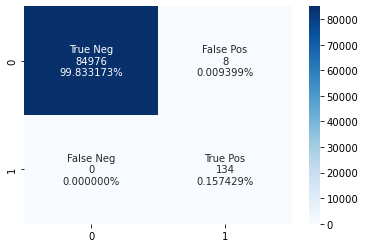

In [31]:
# Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cr_bal_rf_model = classification_report(y_test, y_pred_smote)
print("classification report:\n", cr_bal_rf_model)

print()
cf_bal_rf_model = confusion_matrix(y_test, y_pred_smote)
print("Confusion matrix report:\n", cf_bal_rf_model)

print()
bal_acc_rf_model = accuracy_score(y_test,y_pred_smote, normalize = True) * 100 
print("Balanced accuracy for random forest \n:", bal_acc_rf_model)


# heatmap
print()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_bal_rf_model.flatten()]
group_percentages = ['{0:2%}'.format(value) for value in cf_bal_rf_model.flatten()/np.sum(cf_bal_rf_model)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, (ax1) = plt.subplots(1)
sns.heatmap(cf_bal_rf_model, annot=labels, fmt='', cmap='Blues', ax=ax1)

Text(0, 0.5, 'Recall')

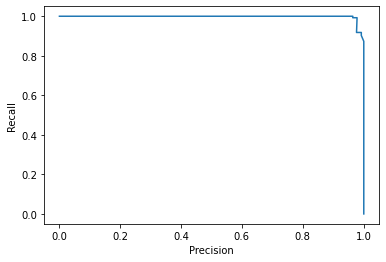

In [32]:
# PR curve


from sklearn.metrics import precision_recall_curve 
precision, recall, thresholds = precision_recall_curve(y_test,bal_rf_model.predict_proba(X_test)[:,1])


plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

Best results of Random Forest (with SMOTE technique):

Balanced Accuracy Score : 99.99060128292489

Recall is 1 with 0 False Negatives (FN), whereas, Original data (imbalanced) had 34 classes of False Negatives.

F1_score is a more useful measure as it takes into account both false positive and false negatives. 
f1-score: 0.97

This model has performed well with balanced data using SMOTE technique.


#### Random Forest (with weights)

In [39]:
# Random Forest with weights

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


# Train and test model using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

weighted_rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42, class_weight='balanced')
weighted_rf_model.fit(X_train,y_train)

y_pred = weighted_rf_model.predict(X_test)



classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.95      0.74      0.83       134

    accuracy                           1.00     85118
   macro avg       0.98      0.87      0.92     85118
weighted avg       1.00      1.00      1.00     85118


Confusion matrix report:
 [[84979     5]
 [   35    99]]

Balanced accuracy for random forest 
: 99.9530064146244



<AxesSubplot:>

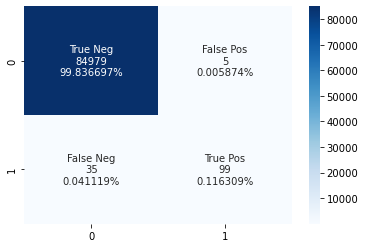

In [40]:
# Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cr_weighted_rf_model = classification_report(y_test, y_pred)
print("classification report:\n", cr_weighted_rf_model)

print()
cf_weighted_rf_model = confusion_matrix(y_test, y_pred)
print("Confusion matrix report:\n", cf_weighted_rf_model)

print()
bal_acc_rf_model = accuracy_score(y_test,y_pred, normalize = True) * 100 
print("Balanced accuracy for random forest \n:", bal_acc_rf_model)


# heatmap
print()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_weighted_rf_model.flatten()]
group_percentages = ['{0:2%}'.format(value) for value in cf_weighted_rf_model.flatten()/np.sum(cf_weighted_rf_model)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, (ax1) = plt.subplots(1)
sns.heatmap(cf_weighted_rf_model, annot=labels, fmt='', cmap='Blues', ax=ax1)

Text(0, 0.5, 'Recall')

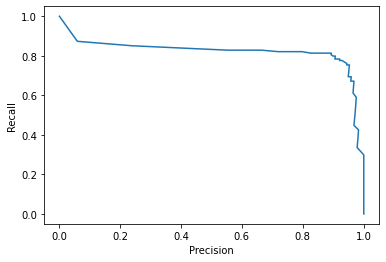

In [41]:
# PR curve


from sklearn.metrics import precision_recall_curve 
precision, recall, thresholds = precision_recall_curve(y_test,weighted_rf_model.predict_proba(X_test)[:,1])


plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

### 2. Logistic regression

#### Logistic regression (with class weights)

In [33]:
# Logistic regression with class weights and original data

from sklearn.linear_model import LogisticRegression
logi_model = LogisticRegression( solver='liblinear', class_weight='balanced')

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# fit model no training data
logi_model.fit(X_train, y_train)
# make predictions for test data
y_pred = logi_model.predict(X_test)

classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     84984
           1       0.06      0.90      0.11       134

    accuracy                           0.98     85118
   macro avg       0.53      0.94      0.55     85118
weighted avg       1.00      0.98      0.99     85118


Confusion matrix report:
 [[83093  1891]
 [   14   120]]

Balanced accuracy for Logistic Regression 
: 97.76193049648722



<AxesSubplot:>

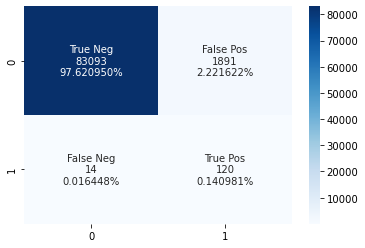

In [34]:
# Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cr_logi_model = classification_report(y_test, y_pred)
print("classification report:\n", cr_logi_model)

print()
cf_logi_model = confusion_matrix(y_test, y_pred)
print("Confusion matrix report:\n", cf_logi_model)

print()
bal_acc_logi_model = accuracy_score(y_test,y_pred, normalize = True) * 100 
print("Balanced accuracy for Logistic Regression \n:", bal_acc_logi_model)


# heatmap
print()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_logi_model.flatten()]
group_percentages = ['{0:2%}'.format(value) for value in cf_logi_model.flatten()/np.sum(cf_logi_model)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, (ax1) = plt.subplots(1)
sns.heatmap(cf_logi_model, annot=labels, fmt='', cmap='Blues', ax=ax1)

Text(0, 0.5, 'Recall')

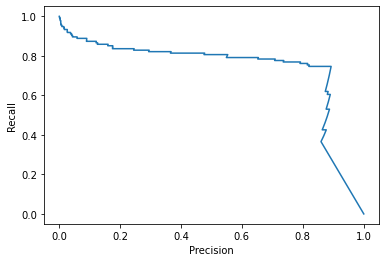

In [35]:
# PR curve


from sklearn.metrics import precision_recall_curve 
precision, recall, thresholds = precision_recall_curve(y_test,logi_model.predict_proba(X_test)[:,1])


plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

#### Logistic regression (with balanced data [SMOTE technique])

In [36]:
# Logistic regression with SMOTE data

from sklearn.linear_model import LogisticRegression
bal_logi_model = LogisticRegression( solver='liblinear')

# split data into train and test sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote_data, y_smote_data, test_size=0.3, random_state=42)

# fit model no training data
bal_logi_model.fit(X_train_smote, y_train_smote)
# make predictions for test data
bal_y_pred = bal_logi_model.predict(X_test)

classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     84984
           1       0.07      0.88      0.13       134

    accuracy                           0.98     85118
   macro avg       0.53      0.93      0.56     85118
weighted avg       1.00      0.98      0.99     85118


Confusion matrix report:
 [[83416  1568]
 [   16   118]]

Balanced accuracy for Logistic Regression 
: 98.13905401912639



<AxesSubplot:>

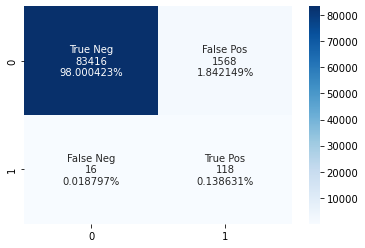

In [37]:
# Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cr_bal_logi_model = classification_report(y_test, bal_y_pred)
print("classification report:\n", cr_bal_logi_model)

print()
cf_bal_logi_model = confusion_matrix(y_test, bal_y_pred)
print("Confusion matrix report:\n", cf_bal_logi_model)

print()
bal_acc_logi_model = accuracy_score(y_test,bal_y_pred, normalize = True) * 100 
print("Balanced accuracy for Logistic Regression \n:", bal_acc_logi_model)


# heatmap
print()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_bal_logi_model.flatten()]
group_percentages = ['{0:2%}'.format(value) for value in cf_bal_logi_model.flatten()/np.sum(cf_bal_logi_model)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, (ax1) = plt.subplots(1)
sns.heatmap(cf_bal_logi_model, annot=labels, fmt='', cmap='Blues', ax=ax1)

Text(0, 0.5, 'Recall')

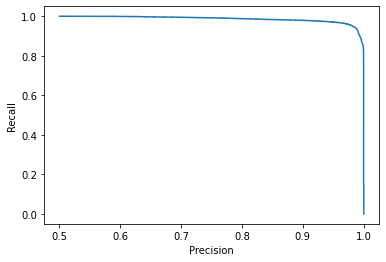

In [45]:
# PR curve


from sklearn.metrics import precision_recall_curve 
precision, recall, thresholds = precision_recall_curve(y_test,bal_logi_model.predict_proba(X_test)[:,1])


plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

Best results of Logistic regression (with SMOTE technique):

Balanced Accuracy Score : 98.13905401912639

Recall is 0.88 with 16 False Negatives (FN).
 
f1-score: 0.13  

This model has not performed well when compared to Random Forest (with SMOTE).

### 3. XG Boost

#### XG Boost (with original data)

In [39]:
# XGBoost with original data

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split


# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# fit model no training data
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# make predictions for test data
y_pred = xgb_model.predict(X_test)

classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.96      0.75      0.84       134

    accuracy                           1.00     85118
   macro avg       0.98      0.87      0.92     85118
weighted avg       1.00      1.00      1.00     85118


Confusion matrix report:
 [[84980     4]
 [   34   100]]

Balanced accuracy for Logistic Regression 
: 99.95535609389319



<AxesSubplot:>

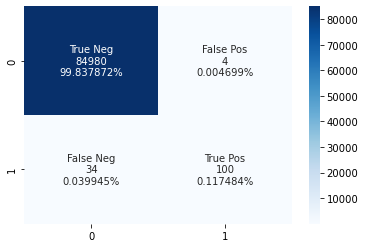

In [40]:
# Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cr_xgb_model = classification_report(y_test, y_pred)
print("classification report:\n", cr_xgb_model)

print()
cf_xgb_model = confusion_matrix(y_test, y_pred)
print("Confusion matrix report:\n", cf_xgb_model)

print()
bal_acc_xgb_model = accuracy_score(y_test,y_pred, normalize = True) * 100 
print("Balanced accuracy for Logistic Regression \n:", bal_acc_xgb_model)


# heatmap
print()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_xgb_model.flatten()]
group_percentages = ['{0:2%}'.format(value) for value in cf_xgb_model.flatten()/np.sum(cf_xgb_model)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, (ax1) = plt.subplots(1)
sns.heatmap(cf_xgb_model, annot=labels, fmt='', cmap='Blues', ax=ax1)

Text(0, 0.5, 'Recall')

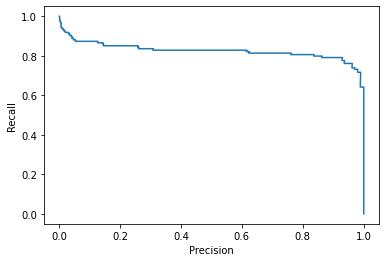

In [41]:
# PR curve


from sklearn.metrics import precision_recall_curve 
precision, recall, thresholds = precision_recall_curve(y_test, xgb_model.predict_proba(X_test)[:,1])


plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

#### XG Boost (with balanced data [SMOTE technique])

In [42]:
# XGBoost with SMOTE data

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split


# split data into train and test sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote_data, y_smote_data, test_size=0.3, random_state=42)

# fit model no training data
bal_xgb_model = XGBClassifier()
bal_xgb_model.fit(X_train_smote, y_train_smote)

# make predictions for test data
bal_y_pred = bal_xgb_model.predict(X_test)

classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.92      0.99      0.96       134

    accuracy                           1.00     85118
   macro avg       0.96      1.00      0.98     85118
weighted avg       1.00      1.00      1.00     85118



Confusion matrix report:
 [[84973    11]
 [    1   133]]

Balanced accuracy for XGBoost model 
: 99.98590192438732



<AxesSubplot:>

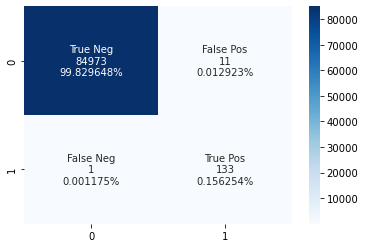

In [43]:
# Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cr_bal_xgb_model = classification_report(y_test, bal_y_pred)
print("classification report:\n", cr_bal_xgb_model)
# xgb_report = classification_report(y_test, bal_y_pred, output_dict=True)
# xgb_df = pd.DataFrame(xgb_report).transpose()
# print(xgb_df)

print()
print()
cf_bal_xgb_model = confusion_matrix(y_test, bal_y_pred)
print("Confusion matrix report:\n", cf_bal_xgb_model)

print()
bal_acc_xgb = accuracy_score(y_test,bal_y_pred, normalize = True) * 100
print("Balanced accuracy for XGBoost model \n:", bal_acc_xgb)


# heatmap
print()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_bal_xgb_model.flatten()]
group_percentages = ['{0:2%}'.format(value) for value in cf_bal_xgb_model.flatten()/np.sum(cf_bal_xgb_model)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, (ax1) = plt.subplots(1)
sns.heatmap(cf_bal_xgb_model, annot=labels, fmt='', cmap='Blues', ax=ax1)

Text(0, 0.5, 'Recall')

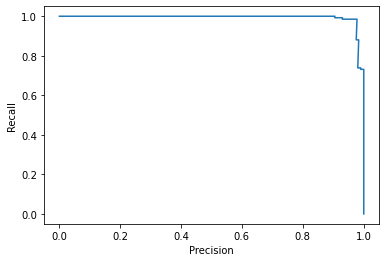

In [44]:
# PR curve


from sklearn.metrics import precision_recall_curve 
precision, recall, thresholds = precision_recall_curve(y_test,bal_xgb_model.predict_proba(X_test)[:,1])


plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

Best results of Logistic regression (with SMOTE technique):

Balanced Accuracy Score : 99.98590192438732

Recall is 0.99 with 1 False Negatives (FN).
 
f1-score: 0.96 

This model has performed well (with SMOTE).

<h3 align='center' style="color: black;">Conclusion</h3>

In [45]:
details = {
    'Model' : ['Random Forest (Orig) %' , 
               'Random Forest (SMOTE) %', 
               'Random Forest (weights) %',
               'Logistic Regression (SMOTE) %',
               'Logistic Regression (weights) %',
               'XGBoost model (Orig) %',
               'XGBoost model (SMOTE) %'],
    'Precision' : [95, 94, 95, 6, 7, 96, 92],
    'Recall' : [75, 100, 74, 90, 88, 75, 99],
    'f1-score' : [84, 97, 83, 11, 13, 84, 96],
    'Bal-acc' : [99.95, 99.99, 99.95, 97.76, 98.13, 99.95, 99.98],
}
  
# creating a Dataframe object 
df = pd.DataFrame(details)
  
df

,Model,Precision,Recall,f1-score,Bal-acc
0,Random Forest (Orig) %,95,75,84,99.95
1,Random Forest (SMOTE) %,94,100,97,99.99
2,Random Forest (weights) %,95,74,83,99.95
3,Logistic Regression (SMOTE) %,6,90,11,97.76
4,Logistic Regression (weights) %,7,88,13,98.13
5,XGBoost model (Orig) %,96,75,84,99.95
6,XGBoost model (SMOTE) %,92,99,96,99.98


### Comparing the results of all the models, Random forest with balanced data (SMOTE technique) has performed well with f1-score 97% and a recall of 100%.